<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.0 MB/s eta 0:00:00


# 第6章

## 例題 6.1

`LinearRegression` 回帰器を用いて，California Housing データに対して線形回帰を行い，性能を評価せよ．

## 線形回帰

必要なライブラリを読み込みます。

In [2]:
# 6章で用いるライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline

In [3]:
# Jupyter notebook で出力を見やすくするための設定
%precision 3
np.set_printoptions(precision=3, suppress=True)
pd.set_option("display.precision", 3)

### データの読み込み

dataをX、targetをyに格納した後、DESCR属性を表示します。

In [4]:
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

学習データXの冒頭5件ほどの内容を確認します。

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325,41.0,6.984,1.024,322.0,2.556,37.88,-122.23
1,8.301,21.0,6.238,0.972,2401.0,2.110,37.86,-122.22
2,7.257,52.0,8.288,1.073,496.0,2.802,37.85,-122.24
3,5.643,52.0,5.817,1.073,558.0,2.548,37.85,-122.25
4,3.846,52.0,6.282,1.081,565.0,2.181,37.85,-122.25


In [6]:
y.head().to_list()

[4.526, 3.585, 3.521, 3.413, 3.422]

特徴のスケールがかなり異なるので、標準化しておきます。

In [7]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

組み込みデータセットの特徴名はfeature_names属性の値として文字列配列の形式で得られます。回帰式の解釈に必要になるので確認しておきます。

In [8]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)で線形回帰関数の学習を行います。

In [9]:
lr = LinearRegression()
lr.fit(X_scaled, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


係数と係数の二乗和を表示します。

In [10]:
for f, w in zip(housing.feature_names, lr.coef_) :
    print(f"{f:12s}: {w:6.2f}")
print(f"intercept   : {lr.intercept_:6.2f}")

MedInc      :   0.83
HouseAge    :   0.12
AveRooms    :  -0.27
AveBedrms   :   0.31
Population  :  -0.00
AveOccup    :  -0.04
Latitude    :  -0.90
Longitude   :  -0.87
intercept   :   2.07


In [11]:
print(f"coef^2 sum : {sum(lr.coef_**2):6.3f}")

coef^2 sum :  2.436


交差確認による[決定係数](http://mathtrain.jp/ketteikeisu)を用いた評価を行います。評価法はcross_val_scoreメソッドのscoring引数で決定係数を指定します。scoring引数の可能な値は[こちら](http://scikit-learn.org/stable/modules/model_evaluation.html)。また、交差確認における分割をランダムにするため、[ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)を使います。


In [12]:
cv = ShuffleSplit(n_splits=10, random_state=1)
pipe = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(pipe, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.61 (+/- 0.01)


### 線形回帰の拡張

* 基底関数の動作確認

In [14]:
poly = PolynomialFeatures(2)        # 2次多項式化
print(poly.fit_transform([[3]]))    # 1次元特徴
print(poly.fit_transform([[2, 3]])) # 2次元特徴

[[1. 3. 9.]]
[[1. 2. 3. 4. 6. 9.]]


## 例題 6.2

[Ridge回帰(L2)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
のパラメータalphaの値でL2正則化項の重みを調整することで、汎化性能が上がる可能性があります。

In [16]:
lr2 = Ridge(alpha=1000)
lr2.fit(X_scaled, y)

,alpha,1000
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


係数と係数の二乗和を表示します。

In [17]:
for f, w in zip(housing.feature_names, lr2.coef_) :
    print(f"{f:12s}: {w:6.2f}")
print(f"intercept   : {lr2.intercept_:6.2f}")

MedInc      :   0.78
HouseAge    :   0.15
AveRooms    :  -0.15
AveBedrms   :   0.17
Population  :   0.01
AveOccup    :  -0.04
Latitude    :  -0.55
Longitude   :  -0.52
intercept   :   2.07


In [18]:
print(f"coef^2 sum : {sum(lr2.coef_**2):6.3f}")

coef^2 sum :  1.262


交差確認による決定係数を用いた評価

In [19]:
pipe2 = make_pipeline(StandardScaler(), Ridge(alpha=1000))
scores = cross_val_score(pipe2, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.59 (+/- 0.01)


[Lasso回帰(L1)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
のパラメータalphaの値を大きくすれば、L1正則化項の重みが大きくなり、重みが0となる次元が増えます。

In [20]:
lr3 = Lasso(alpha=0.05)
lr3.fit(X_scaled, y)

,alpha,0.05
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


係数と係数の二乗和を表示します。

In [21]:
for f, w in zip(housing.feature_names, lr3.coef_) :
    print(f"{f:12s}: {w:6.2f}")
print(f"intercept   : {lr3.intercept_:6.2f}")

MedInc      :   0.74
HouseAge    :   0.14
AveRooms    :  -0.00
AveBedrms   :   0.00
Population  :   0.00
AveOccup    :  -0.00
Latitude    :  -0.26
Longitude   :  -0.22
intercept   :   2.07


In [22]:
print(f"coef^2 sum : {sum(lr3.coef_**2):6.3f}")

coef^2 sum :  0.676


結果に影響の大きい特徴をリストアップ

In [23]:
for f, w in zip(housing.feature_names, lr3.coef_) :
    if abs(w) > 0.1 :
        print(f"{f:12s}: {w:6.2f}")

MedInc      :   0.74
HouseAge    :   0.14
Latitude    :  -0.26
Longitude   :  -0.22


交差確認による決定係数を用いた評価

In [24]:
pipe3 = make_pipeline(StandardScaler(), Lasso(alpha=0.05))
scores = cross_val_score(pipe3, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.55 (+/- 0.01)


## 回帰木

回帰木の作成。深さは3にしておきます。

In [27]:
rt = DecisionTreeRegressor(max_depth=3)
rt.fit(X_scaled, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


木の表示を行います。ノードの色の濃さはそのノードに割り当てられた出力値の平均を反映しています。

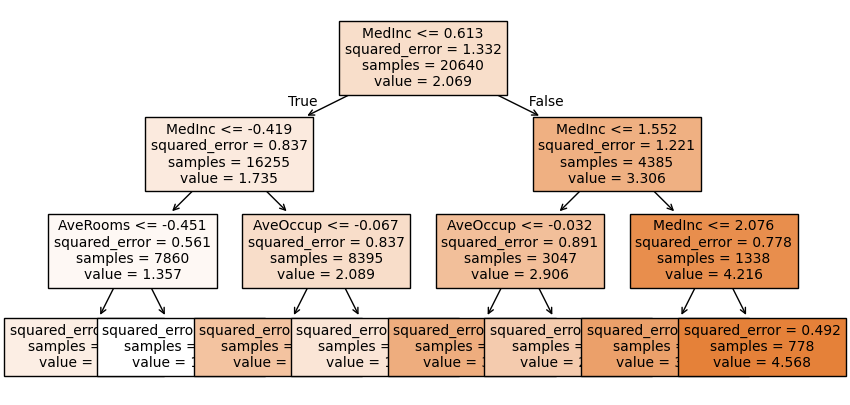

In [28]:
plt.figure(figsize=(10,5))
plot_tree(rt, filled=True, feature_names=housing.feature_names, fontsize=10)
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

### 評価

交差確認による決定係数を用いた評価

In [29]:
pipe_t1 = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=3))
scores = cross_val_score(pipe_t1, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.52 (+/- 0.02)


### ハイパーパラメータの変更

木を浅くしてみます。

In [30]:
rt2 = DecisionTreeRegressor(max_depth = 2)
rt2.fit(X_scaled,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


木の表示

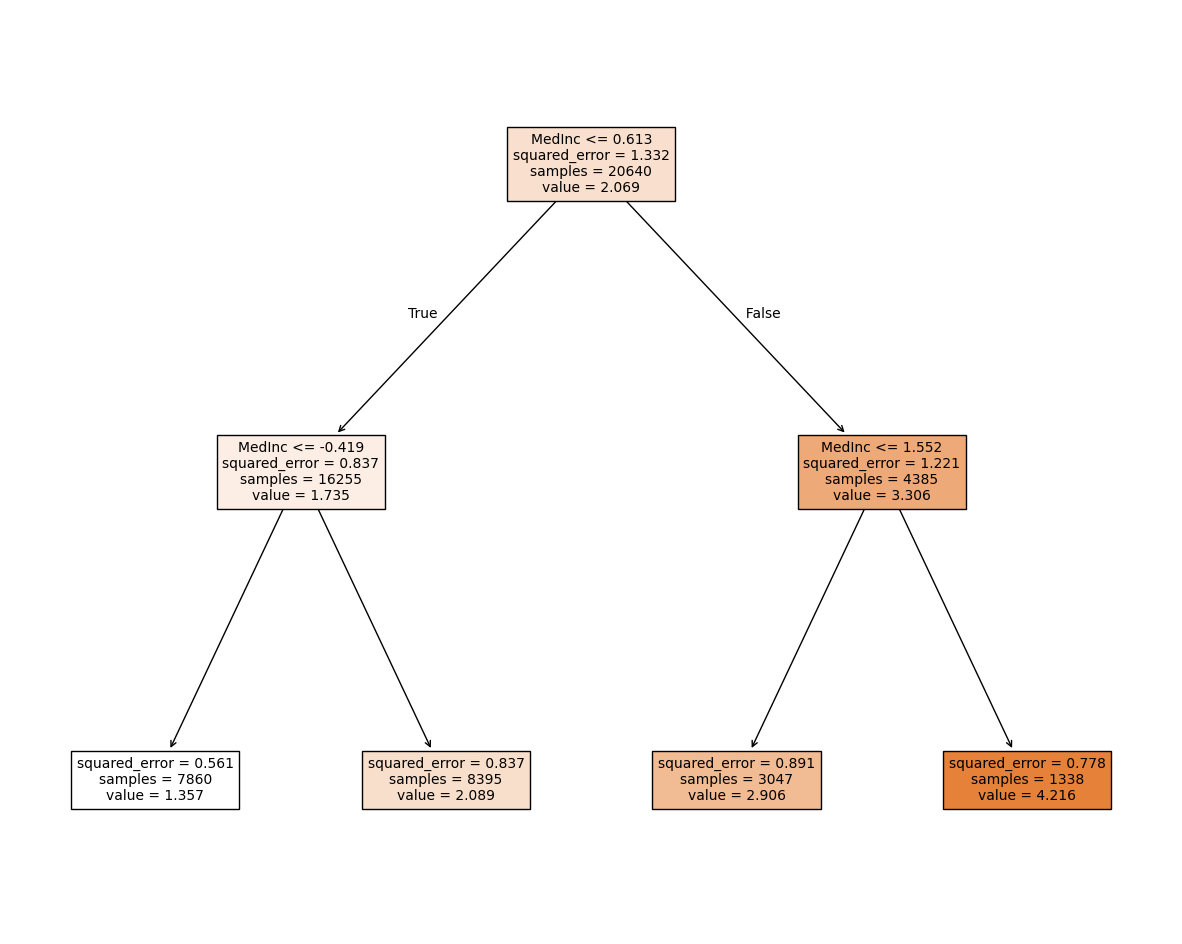

In [31]:
plt.figure(figsize=(15,12))
plot_tree(rt2, filled=True, feature_names=housing.feature_names, fontsize=10)
plt.show()

交差確認による決定係数を用いた評価

In [32]:
pipe_t2 = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=2))
scores = cross_val_score(pipe_t2, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.44 (+/- 0.02)


木を深くしてみます。

In [33]:
rt3 = DecisionTreeRegressor(max_depth = 6)
rt3.fit(X_scaled,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


木の表示

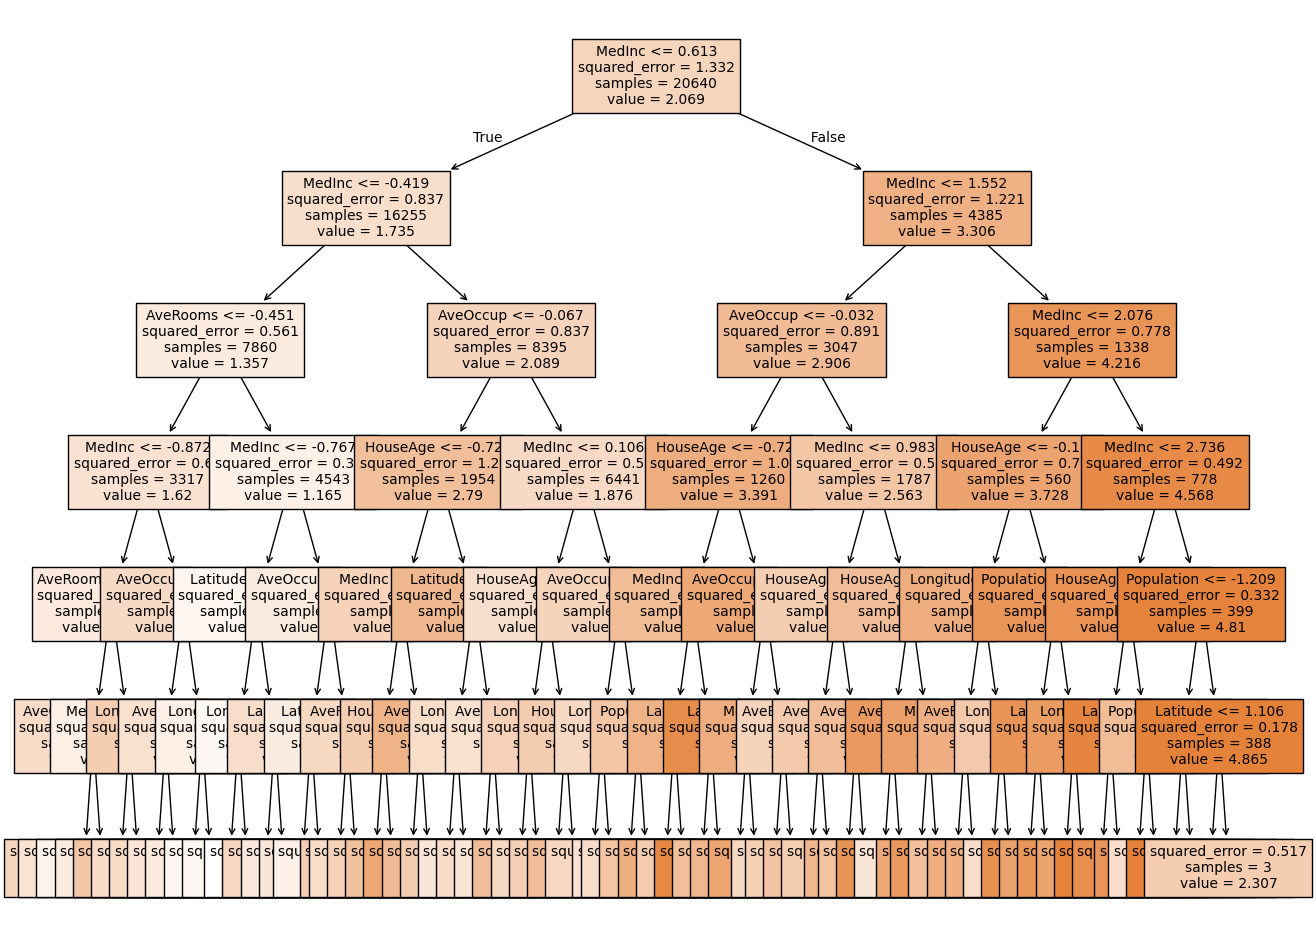

In [34]:
plt.figure(figsize=(15,12))
plot_tree(rt3, filled=True, feature_names=housing.feature_names, fontsize=10)
plt.show()

交差確認による決定係数を用いた評価

In [35]:
pipe_t3 = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=6))
scores = cross_val_score(pipe_t3, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.65 (+/- 0.01)


二乗誤差の値を見ると、深い木の方が性能が高くなっています。これはこのデータのみに言えることで、一般化はできません。

# 演習問題


### 6-1

ブドウの生育期間の気温や降水量からワインの価格を推定するアッシェンフェルターのワイン方程式を，論文で公開されているデータ (http://www.liquidasset.com/winedata.html) をもとに導出せよ．

In [ ]:
!mkdir data

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

wine_data = pd.read_csv('data/wine.csv')
wine_data_cleaned = wine_data.dropna(subset=['LPRICE2'])

X = wine_data_cleaned.drop(columns=['OBS', 'VINT', 'LPRICE2'])
y = wine_data_cleaned['LPRICE2']

model = LinearRegression()
model.fit(X, y)

print('LPRICE2 =')
for w, f in zip(model.coef_, X.columns):
    print(f'{w:12.6f} * {f} +')
print(f'{model.intercept_:12.6f}')

LPRICE2 =
    0.001167 * WRAIN +
    0.616392 * DEGREES +
   -0.003861 * HRAIN +
    0.023847 * TIME_SV +
  -12.145334
